In [58]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import numpy as np
import pandas as pd
import scipy
from scipy import stats

## Data Preparation

### Get data

In [59]:
developed_banks_df = pd.read_csv('data_collection/all_banks_developed.csv')

# developing countries
india = pd.read_csv('data_collection/india.csv')
argentina = pd.read_csv('data_collection/argentina.csv')
brazil = pd.read_csv('data_collection/brazil.csv')
indonesia = pd.read_csv('data_collection/indonesia.csv')
russia = pd.read_csv('data_collection/russia.csv')
thailand = pd.read_csv('data_collection/thailand.csv')
turkey = pd.read_csv('data_collection/turkey.csv')

In [60]:
developing_banks_df = pd.concat([india, argentina, brazil, indonesia, russia, thailand, turkey], ignore_index=True)

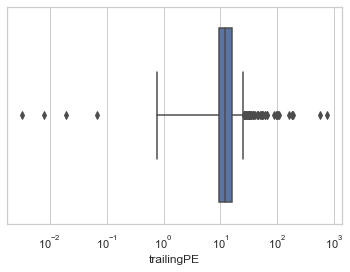

In [50]:
"""
Resource 1
"""
sns.set(style="whitegrid")

ax = sns.boxplot(x=developed_banks_df['trailingPE'], showfliers = True)
ax.set_xscale("log", base = 10)

plt.show()

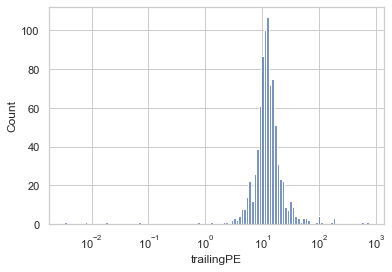

In [5]:
sns.histplot(data=developed_banks_df, x="trailingPE", log_scale=True)

plt.show()

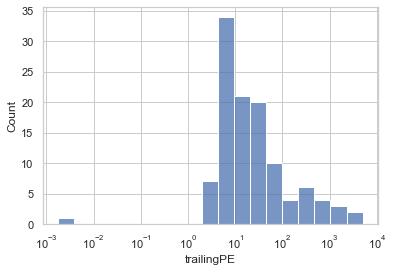

In [6]:
sns.histplot(data=developing_banks_df, x="trailingPE", log_scale=True)

plt.show()

### NA Removal

In [56]:
""" Resource 2
"""
dev_threshold = int(len(developed_banks_df) * 0.75)
developed_banks_df.dropna(axis=1, thresh= dev_threshold, inplace=True)  

# gets rid of fiveYearAvgDividendYield, pegRatio, forwardPE

# gets rid of fiveYearAvgDividendYield, pegRatio, forwardPE, trailingAnnualDividendYield
# Therefore trailingAnnualDividendYield should be removed from the developing banks df as well

turkey = turkey.drop(labels = ['trailingAnnualDividendYield', 'fiveYearAvgDividendYield',
                                           'pegRatio', 'forwardPE', 
                               'priceToBook', 'trailingPE', 'priceToSalesTrailing12Months'], axis = 1)

developed_banks_df = developed_banks_df.drop(labels = ['trailingAnnualDividendYield'], axis = 1)

developed_banks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   symbol                        924 non-null    object 
 1   shortName                     924 non-null    object 
 2   country                       924 non-null    object 
 3   averageVolume                 923 non-null    float64
 4   currentPrice                  924 non-null    float64
 5   currency                      924 non-null    object 
 6   sector                        924 non-null    object 
 7   industry                      924 non-null    object 
 8   profitMargins                 924 non-null    float64
 9   operatingMargins              924 non-null    float64
 10  operatingCashflow             706 non-null    float64
 11  returnOnAssets                873 non-null    float64
 12  returnOnEquity                877 non-null    float64
 13  trail

### NA Handling

In [57]:
# String columns
""" Resource 3
"""
developed_banks_str_removed_df = developed_banks_df.drop(labels = ['symbol', 'shortName', 'sector', 
                'averageVolume', 'currentPrice', 'currency',
                'country', 'industry'], axis = 1)

developed_banks_str_removed_df = developed_banks_str_removed_df.fillna(developed_banks_str_removed_df.median())
developed_banks_str_removed_df

,profitMargins,operatingMargins,operatingCashflow,returnOnAssets,returnOnEquity,trailingEps,totalRevenue,revenuePerShare,revenueGrowth,grossProfits,...,trailingPE,earningsQuarterlyGrowth,priceToSalesTrailing12Months,priceToBook,enterpriseToRevenue,beta,fiftyTwoWeekHigh,fiftyTwoWeekLow,fiftyDayAverage,twoHundredDayAverage
0,0.21959,0.29834,-1.990000e+11,0.00386,0.05670,28.979769,6.623257e+10,3.280234,0.393,5.742410e+10,...,17.907143,8.228,1.600416,43.438835,-8.107,0.628278,638.313907,388.466900,542.552262,580.805267
1,0.17782,0.28157,-5.015069e+10,0.00266,0.04509,3.725970,1.734508e+10,0.262198,0.506,1.518816e+10,...,16.683332,1.910,2.543163,64.812950,3.327,1.483139,69.772243,32.547040,61.687923,62.299824
2,0.25740,0.35203,1.878303e+10,0.00400,0.08023,20.423837,2.928337e+10,1.700146,0.666,2.354261e+10,...,12.345946,6.777,1.463448,48.300293,1.943,1.425313,300.327003,122.681021,251.766737,247.599542
3,-0.00627,0.19160,-2.384846e+10,-0.00006,-0.00120,-4.829961,1.166781e+10,0.961852,0.220,1.095159e+10,...,12.162663,0.812,2.916249,57.692310,-17.127,1.663349,306.770172,124.944203,294.159998,279.099889
4,0.10046,0.19423,-1.642720e+10,0.00170,0.02607,27.323782,1.793986e+10,5.695215,0.160,1.719466e+10,...,22.323233,1.141,1.060470,27.573300,-0.555,1.208955,735.810129,461.261319,623.551861,657.183324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,0.34267,0.44012,-2.861520e+09,0.01154,0.14360,0.006279,2.046331e+09,0.020258,0.157,1.854871e+09,...,16.149069,0.454,5.005604,2.062564,7.502,0.396551,0.117000,0.076388,0.094204,0.098954
920,0.38450,0.48708,3.955775e+09,0.01107,0.18645,0.003830,2.217141e+09,0.011765,0.385,1.934962e+09,...,13.883231,1.186,4.519187,2.162305,9.242,0.466843,0.061230,0.034203,0.051167,0.052024
921,0.28513,0.30578,6.366968e+09,0.00724,0.10744,3.239071,1.960787e+09,13.148256,0.272,1.769014e+09,...,12.883324,0.910,3.166120,1.196748,10.799,0.320512,51.974000,30.680000,41.150682,43.537543
922,0.13463,0.23643,9.173025e+08,0.00915,0.09474,0.000320,1.249055e+09,7.519000,0.095,8.119410e+08,...,8.337399,2.326,1.093812,0.453861,9.927,0.539703,0.003900,0.002379,0.002613,0.002998


### Outlier Removal (developed countries)

In [30]:
""" Resource 4
"""
# Commented out codes for getting dataframe from z in case it does not works
# z = np.abs(stats.zscore(developed_banks_str_removed_df))  # WORKS
z = pd.DataFrame(np.abs(stats.zscore(developed_banks_str_removed_df))) # FOR NOT WORKS
z.columns = list(developed_banks_str_removed_df)

threshold = 3

In [31]:
banks_outliers_removed_df = developed_banks_str_removed_df[(z['trailingPE'] < 3)]
banks_outliers_removed_df = banks_outliers_removed_df[(z['priceToBook'] < 3)]

<ipython-input-31-3632d0b32078>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  banks_outliers_removed_df = banks_outliers_removed_df[(z['priceToBook'] < 3)]


In [32]:
developed_banks_str_removed_df.shape, banks_outliers_removed_df.shape

((924, 28), (910, 28))

In [33]:
removed = pd.concat([banks_outliers_removed_df, developed_banks_str_removed_df]).drop_duplicates(keep = False)
   
removed[['trailingPE', 'priceToBook']] 

,trailingPE,priceToBook
0,17.907143,43.438835
1,16.683332,64.812950
2,12.345946,48.300293
3,12.162663,57.692310
4,22.323233,27.573300
5,12.162663,55.300453
7,14.671362,86.105940
9,12.162663,72.396440
15,188.768110,0.352094
159,740.477050,0.430105


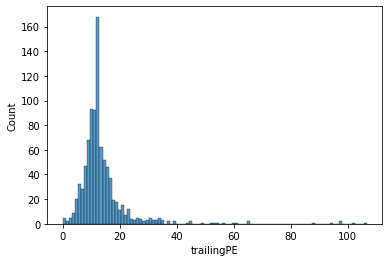

In [14]:
sns.histplot(data=banks_outliers_removed_df, x="trailingPE", log_scale=False)

plt.show()

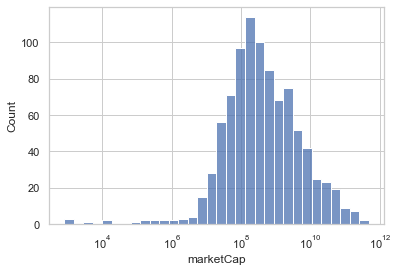

In [16]:
sns.histplot(data=banks_outliers_removed_df, x="marketCap", log_scale=True )

plt.show()

In [34]:
print('Developed Banks Data overview', '\n')
'''
print('trailingPE')
print(banks_outliers_removed_df['trailingPE'].quantile(0.25))
print(banks_outliers_removed_df['trailingPE'].median())
print(banks_outliers_removed_df['trailingPE'].quantile(0.75), '\n')

print('priceToBook')
print(banks_outliers_removed_df['priceToBook'].quantile(0.25))
print(banks_outliers_removed_df['priceToBook'].median())
print(banks_outliers_removed_df['priceToBook'].quantile(0.75), '\n')
'''
print('marketCap')
print(banks_outliers_removed_df['marketCap'].quantile(0.25) / 1000000)
print(banks_outliers_removed_df['marketCap'].median() / 1000000)
print(banks_outliers_removed_df['marketCap'].quantile(0.75) / 1000000)

Developed Banks Data overview 

marketCap
91.549808
342.61475592499994
1958.197952


In [35]:
print('Turkey Banks Data overview', '\n')
'''
print('trailingPE')
print(turkey['trailingPE'].quantile(0.25))
print(turkey['trailingPE'].median())
print(turkey['trailingPE'].quantile(0.75), '\n')

print('priceToBook')
print(turkey['priceToBook'].quantile(0.25))
print(turkey['priceToBook'].median())
print(turkey['priceToBook'].quantile(0.75), '\n')
'''
print('marketCap')
print(turkey['marketCap'].quantile(0.25) / 1000000)
print(turkey['marketCap'].median() / 1000000)
print(turkey['marketCap'].quantile(0.75) / 1000000)

Turkey Banks Data overview 

marketCap
640.9676822360175
1926.9023429310223
2672.339580312466


### Save to CSV

In [61]:
turkey.to_csv('turkey_dropped.csv', index=False)
developing_banks_df.to_csv('developing_banks_dropped.csv', index=False)

### Separate input and output

In [37]:
y = banks_outliers_removed_df['marketCap']
y = y / 1000000000
y.to_csv('y.csv', index=False)
print(y.mean())
print(y.median())

6.536612170257556
0.342614755925


In [38]:
x = banks_outliers_removed_df.drop(labels = ['marketCap'], axis = 1)

In [39]:
x

,profitMargins,operatingMargins,operatingCashflow,returnOnAssets,returnOnEquity,trailingEps,totalRevenue,revenuePerShare,revenueGrowth,grossProfits,...,earningsQuarterlyGrowth,priceToSalesTrailing12Months,priceToBook,enterpriseToRevenue,beta,fiftyTwoWeekHigh,fiftyTwoWeekLow,fiftyDayAverage,twoHundredDayAverage,trailingAnnualDividendYield
6,0.51924,0.00000,2.641800e+07,0.03028,0.24787,1.638000,1.377020e+08,7.519000,0.623,1.089057e+09,...,0.763,2.878061,1.057977,2.125,1.444716,2334.941368,1145.032063,2140.976326,1799.179825,0.026844
8,-1.00366,-0.82735,-7.645139e+08,-0.01372,-0.21010,-241.498073,4.148247e+08,2.405321,0.298,4.148247e+08,...,0.443,0.587926,13.710541,-8.291,2.686567,224.938205,79.156168,138.510646,149.074746,0.026844
10,0.19459,0.27386,9.647820e+10,0.00321,0.07193,6.695752,4.942770e+10,39.606716,0.085,4.663466e+10,...,0.266,1.593478,0.587687,-9.466,2.013683,68.229760,33.914620,62.908145,62.691935,0.020495
11,0.23617,0.41182,-4.814250e+10,0.00416,0.07462,0.851694,1.985166e+10,5.088960,0.361,1.769120e+10,...,3.880,2.709539,0.829587,3.639,2.111672,14.098304,6.652166,13.605574,12.850589,0.010188
12,0.32535,0.41468,1.197084e+10,0.00435,0.07862,0.743318,9.388660e+09,2.330084,0.247,8.853848e+09,...,0.713,5.611280,1.295772,20.555,1.070757,13.031036,7.307134,12.027838,10.810964,0.036259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,0.34267,0.44012,-2.861520e+09,0.01154,0.14360,0.006279,2.046331e+09,0.020258,0.157,1.854871e+09,...,0.454,5.005604,2.062564,7.502,0.396551,0.117000,0.076388,0.094204,0.098954,0.028138
920,0.38450,0.48708,3.955775e+09,0.01107,0.18645,0.003830,2.217141e+09,0.011765,0.385,1.934962e+09,...,1.186,4.519187,2.162305,9.242,0.466843,0.061230,0.034203,0.051167,0.052024,0.040742
921,0.28513,0.30578,6.366968e+09,0.00724,0.10744,3.239071,1.960787e+09,13.148256,0.272,1.769014e+09,...,0.910,3.166120,1.196748,10.799,0.320512,51.974000,30.680000,41.150682,43.537543,0.022015
922,0.13463,0.23643,9.173025e+08,0.00915,0.09474,0.000320,1.249055e+09,7.519000,0.095,8.119410e+08,...,2.326,1.093812,0.453861,9.927,0.539703,0.003900,0.002379,0.002613,0.002998,0.034906


C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


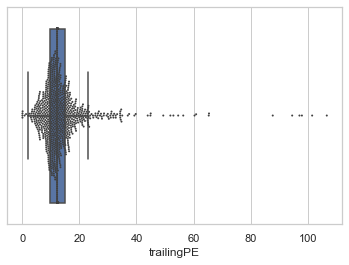

In [40]:
peRatio2 = x['trailingPE']

sns.set(style="whitegrid")

ax = sns.boxplot(x=peRatio2, showfliers = False)
ax = sns.swarmplot(x=peRatio2, color=".25", size=2)



plt.show()


C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 70.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


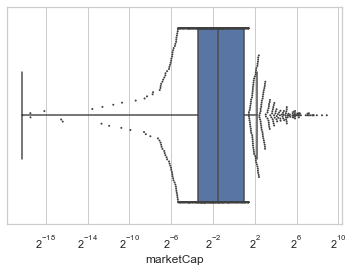

In [23]:
y_box = y

sns.set(style="whitegrid")

ax = sns.boxplot(x=y_box, showfliers = False)
ax = sns.swarmplot(x=y_box, color=".25", size=2)
ax.set_xscale("log", base = 2)

plt.show()

### Removing Features calculated using Price

In [41]:
x = x.drop(labels = ['priceToBook', 'trailingPE', 'priceToSalesTrailing12Months'], axis = 1)

### Fill NaN values with median of each columns and save data to csv before implementing scaling

In [42]:
""" Resource 2
"""
x = x.fillna(x.median())
x.to_csv('x_original.csv', index=False)

### Get headers

In [43]:
headers = list(x)

### Implement scaling

In [44]:
"""
Resource 5
"""
x_scaled = x
x_scaled = StandardScaler().fit_transform(x_scaled)

x_scaled_df = pd.DataFrame(x_scaled)
x_scaled_df.columns = headers   
    
x_scaled_df

,profitMargins,operatingMargins,operatingCashflow,returnOnAssets,returnOnEquity,trailingEps,totalRevenue,revenuePerShare,revenueGrowth,grossProfits,...,bookValue,enterpriseValue,earningsQuarterlyGrowth,enterpriseToRevenue,beta,fiftyTwoWeekHigh,fiftyTwoWeekLow,fiftyDayAverage,twoHundredDayAverage,trailingAnnualDividendYield
0,1.165284,-0.136708,0.069562,2.138612,1.346731,-0.073112,-0.219909,-0.067585,0.079991,-0.117291,...,-0.099659,0.000657,-0.091970,-0.043791,-0.032095,1.902443,1.477953,1.782770,1.562015,-0.033370
1,-5.421747,-0.526463,0.020388,-2.250398,-2.514346,-3.333490,-0.192521,-0.082150,-0.032285,-0.190137,...,-0.101389,-0.089408,-0.137269,-1.228332,-0.025666,0.101301,0.018761,0.034468,0.048909,-0.033370
2,-0.238931,-0.007696,6.066225,-0.561627,-0.136593,-0.005289,4.651302,0.023804,-0.105869,4.803595,...,-0.091894,-9.424881,-0.162326,-1.361957,-0.029149,-0.032468,-0.043175,-0.031538,-0.030301,-0.033375
3,-0.059084,0.057296,-2.925228,-0.466864,-0.113914,-0.083656,1.728373,-0.074506,-0.010521,1.676456,...,-0.100637,1.431203,0.349273,0.128386,-0.028642,-0.078676,-0.080498,-0.074583,-0.076005,-0.033382
4,0.326648,0.058643,0.812178,-0.447911,-0.080190,-0.085109,0.694341,-0.082364,-0.049904,0.721641,...,-0.101268,3.858092,-0.099048,2.052127,-0.034032,-0.079587,-0.079601,-0.075960,-0.077875,-0.033363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0.401562,0.070628,-0.109989,0.269293,0.467646,-0.094993,-0.031283,-0.088943,-0.080996,-0.034550,...,-0.097944,0.288212,-0.135712,0.567699,-0.037522,-0.090611,-0.089500,-0.086379,-0.087698,-0.033369
906,0.582490,0.092750,0.313860,0.222410,0.828908,-0.095025,-0.014403,-0.088967,-0.002230,-0.025896,...,-0.100090,0.391460,-0.032090,0.765577,-0.037158,-0.090658,-0.089558,-0.086417,-0.087741,-0.033360
907,0.152683,0.007342,0.463771,-0.159633,0.162787,-0.051642,-0.039737,-0.051553,-0.041267,-0.043826,...,2.943031,0.405214,-0.071161,0.942644,-0.037916,-0.046345,-0.047604,-0.050534,-0.047866,-0.033373
908,-0.498277,-0.025328,0.124951,0.030890,0.055715,-0.095072,-0.110076,-0.067585,-0.102415,-0.147231,...,-0.101725,0.228885,0.129289,0.843477,-0.036781,-0.090707,-0.089601,-0.086459,-0.087786,-0.033364


### Dataframe from scaled input arrays

In [45]:
x_scaled_df = pd.DataFrame(x_scaled)
x_scaled_df.columns = headers
x_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   profitMargins                910 non-null    float64
 1   operatingMargins             910 non-null    float64
 2   operatingCashflow            910 non-null    float64
 3   returnOnAssets               910 non-null    float64
 4   returnOnEquity               910 non-null    float64
 5   trailingEps                  910 non-null    float64
 6   totalRevenue                 910 non-null    float64
 7   revenuePerShare              910 non-null    float64
 8   revenueGrowth                910 non-null    float64
 9   grossProfits                 910 non-null    float64
 10  netIncomeToCommon            910 non-null    float64
 11  totalCash                    910 non-null    float64
 12  totalCashPerShare            910 non-null    float64
 13  totalDebt           

1. Seaborn plot: https://seaborn.pydata.org/generated/seaborn.boxplot.html
2. Pandas drop column: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
3. Pandas Fillna: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
4. Outlier removal: https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame
5. Standard scaler from scikit learn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html